## Assignment 4

This assignment is based on content discussed in module 8 and using Decision Trees and Ensemble Models in classification and regression problems.

## Learning outcomes 

- Understand how to use decision trees on a Dataset to make a prediction
- Learning hyper-parameters tuning for decision trees by using RandomGrid 
- Learning the effectiveness of ensemble algorithms (Random Forest, Adaboost, Extra trees classifier, Gradient Boosted Tree)

In the first part of this assignment, you will use Classification Trees for predicting if a user has a default payment option active or not. You can find the necessary data for performing this assignment [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) 

This dataset is aimed at the case of customer default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default.

Required imports for this project are given below. Make sure you have all libraries required for this project installed. You may use conda or pip based on your set up.

__NOTE:__ Since data is in Excel format you need to install `xlrd` in order to read the excel file inside your pandas dataframe. You can run `pip install xlrd` to install 

In [1]:
#required imports
import numpy as np
import pandas as pd

After installing the necessary libraries, proceed to download the data. Since reading the excel file won't create headers by default, we added two more operations to substitute the columns.

In [2]:
#loading the data
dataset = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls")
dataset.columns = dataset.iloc[0]
dataset.drop(columns=['ID'], inplace=True)
dataset = dataset[1:]
dataset = dataset.reset_index(drop=True)
dataset = dataset.astype('str').astype('int64')

In the following, you can take a look into the dataset.

In [3]:
dataset.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


## Questions (15 points total)

#### Question 1 (2 pts)
Build a classifier by using decision tree and calculate the confusion matrix. Try different hyper-parameters (at least two) and discuss the result.

In [4]:
# more required imports
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from IPython.display import SVG
from sklearn import tree

# split columns into features and target variables
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
target = ['default payment next month']

# set independent variables (X) and dependent variable (y)
X = dataset[features]
y = dataset[target].values

# split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# set decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=5, criterion='entropy')

# parameters to tune will be min samples leaf and min samples split
param_grid = {
      'min_samples_leaf': [2, 20, 50, 100]
    , 'min_samples_split': [2, 20, 50, 100]
}

# grid search with roc auc as scoring method
grid_search = GridSearchCV(estimator=tree_clf, 
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5)

# fit decision tree classifier
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

# best parameters are min_samples_leaf = 100 and min_samples_split = 2

{'min_samples_leaf': 100, 'min_samples_split': 2}


In [5]:
# use model with best parameters to predict test set
y_actu = y_test
y_pred = grid_search.predict(X_test)

# calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_actu, y_pred).ravel()
(tn, fp, fn, tp)

# 4494 are TN, 209 are FP, 822 are FN, 475 are TP 

(4494, 209, 822, 475)

In [6]:
# Choose parameters other than then best params. For example, min_samples_leaf = 50 and min_samples_split = 5
another_tree_clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf = 50, min_samples_split = 5, criterion='entropy')

# fit the model with this selected parameters
another_tree_clf.fit(X_train, y_train)

# use model with best parameters to predict test set
y_actu = y_test
y_pred = another_tree_clf.predict(X_test)

# calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_actu, y_pred).ravel()
(tn, fp, fn, tp)

# 4480 are TN, 223 are FP, 808 are FN, 489 are TP 

(4480, 223, 808, 489)

In [7]:
# Our best parameters model has higher TN and FN but lower FP and TP compared to the other model that we fitted above

#### Question 2 (4 pts)

Try to build the decision tree which you built for the previous question, but this time by RandomizedSearchCV over hyper-parameters. Compare the results.

In [8]:
# more required imports
from sklearn.model_selection import RandomizedSearchCV

# randomized search with roc auc as scoring method
randomized_search = RandomizedSearchCV(estimator=tree_clf, 
                           param_distributions=param_grid,
                           scoring='roc_auc',
                           cv=5)

# fit decision tree classifier
randomized_search.fit(X_train, y_train)
print(randomized_search.best_params_)

# parameters are selected randomly based on param_grid

{'min_samples_split': 100, 'min_samples_leaf': 100}


In [9]:
# use model with parameters selected above to predict test set
y_actu = y_test
y_pred = randomized_search.predict(X_test)

# calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_actu, y_pred).ravel()
(tn, fp, fn, tp)

# 4494 are TN, 209 are FP, 822 are FN, 475 are TP

(4494, 209, 822, 475)

In [10]:
# Our model with RandomizedSearchCV has same confusion matrix results as our best parameters model above

#### Question 3 (6 pts)

Try to build the same classifier by using following ensemble models. For each of these models calculate accuracy and at least for two in the list below, plot the learning curves.

* Random Forest 
* AdaBoost
* Extra Trees Classifier 
* Gradient Boosted Trees 


In [11]:
# more required imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Random Forest

# set random forest classifier
rnd_clf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, n_jobs=-1)

# fit random forest classifier
rnd_clf.fit(X_train, y_train)

# use trained model to predict test set
y_pred = rnd_clf.predict(X_test)

# calculate accuracy
print(accuracy_score(y_test, y_pred))

0.818


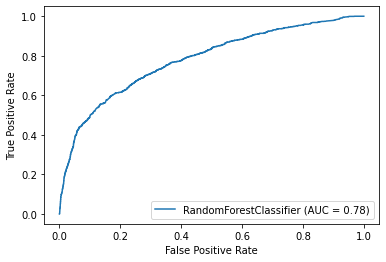

In [13]:
# plot Random Forest learning curve
plot_roc_curve(rnd_clf, X_test, y_test)

In [14]:
# AdaBoost

# set adaboost classifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5)

# fit adaboost classifier
ada_clf.fit(X_train, y_train)

# use trained model to predict test set
y_pred = ada_clf.predict(X_test)

# calculate accuracy
print(accuracy_score(y_test, y_pred))

0.825


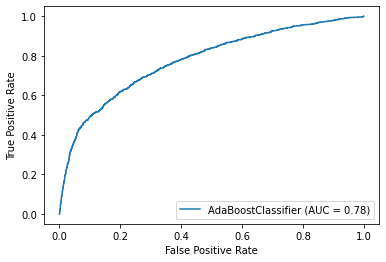

In [15]:
# plot AdaBoost learning curve
plot_roc_curve(ada_clf, X_test, y_test)

In [16]:
# Extra Trees Classifier

# set extra trees classifier
forest_clf = ExtraTreesClassifier(n_estimators=5)

# fit extra trees classifier
forest_clf.fit(X_train, y_train)

# use trained model to predict test set
y_pred = forest_clf.predict(X_test)

# calculate accuracy
print(accuracy_score(y_test, y_pred))

0.7906666666666666


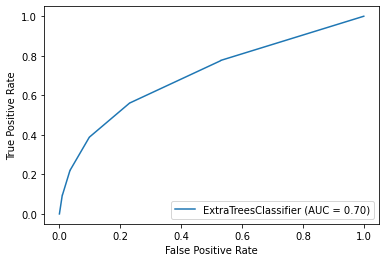

In [17]:
# plot Extra Trees Classifier learning curve
plot_roc_curve(forest_clf, X_test, y_test)

In [18]:
# Gradient Boosted Trees

# set gradient boosted trees classifier
gb_clf = GradientBoostingClassifier(n_estimators=100)

# fit gradient boosted trees classifier
gb_clf.fit(X_train, y_train)

# use trained model to predict test set
y_pred = gb_clf.predict(X_test)

# calculate accuracy
print(accuracy_score(y_test, y_pred))

0.828


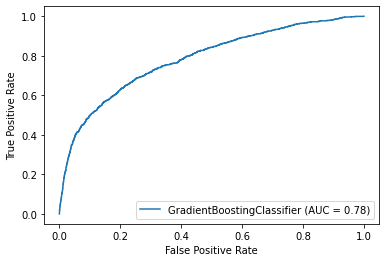

In [19]:
# plot Gradient Boosted Trees learning curve
plot_roc_curve(gb_clf, X_test, y_test)

#### Question 4 (3 pts)

Discuss and compare the results for the all past three questions. 

* How does changing hyperparms effect model performance? 
* Why do you think certain models performed better/worse? 
* How does this performance line up with known strengths/weakness of these models?

In [20]:
# Question: How does changing hyperparms effect model performance?
# Answer: Changing hyperparms impacts the confusion matrix, hence impacts the accuracy score and model performance.
#         For example, our best parameters model has higher TN and FN but lower FP and TP compared to the another model in Q1.

# Question: Why do you think certain models performed better/worse?
# Answer: This is because each model has its own strengths/weaknesses. Certain classification models would work better
#         under certain conditions/problems, while certain models would be less favoured under the same conditions/problems.

# Question: How does this performance line up with known strengths/weakness of these models?
# Answer: Models that are more suitable to the datasets/problems will give better accuracy score and better performance.
#         For example, Gradient Boosted Trees gives us the highest accuracy score on Credit Card Default dataset at 82.8%.
#         Our dataset works better when modeled into model that combines many relatively weak and inaccurate rules, and 
#         when each one correcting its predecessor, while at the same time it will also try to fit a new predictor to 
#         residual errors made by the previous predictor.